## Customer Review Analysis For Leading woman clothing E- Commerce Company 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel(r"Womens Clothing Reviews Data.xlsx")
data

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


## a. Performing exploratory analysis on the data to understand the patterns


In [3]:
data.shape

(23486, 11)

In [3]:
data.isna().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [4]:
data.dropna(inplace=True)

In [5]:
data.reset_index(drop=True,inplace=True)

In [6]:
data.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
1,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
2,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
3,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0
4,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1


In [8]:
import re
!pip install contractions
import contractions
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps=PorterStemmer()
lm=WordNetLemmatizer()

In [10]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
stop_words = nltk.corpus.stopwords.words("english")

In [12]:
stop_words=list(set(stop_words+["the","me","how","what","wa",'xsi', 'xslbs', 'yo',"x","ha"]))

## creating UDF to clean the text

In [13]:
def lower(x):
    x=x.lower()
    return x
def strip(x):
    x=x.strip()
    return x
def expand_contraction(x):
    x=contractions.fix(x)
    return x
def remove_special_char_and_digit(x):
    re.sub(r' +', ' ', x) #Replaces sequences of one or more spaces (' +') with a single space.
    x=re.sub("[^a-z\s]","",x) #Removes everything except lowercase letters (a-z) and spaces (\s)
    x=re.sub("\s{2,}","",x) #Removes sequences of two or more spaces (\s{2,}).
    x=re.sub(r"[-()\"#/@;:{}`+=~|.!?*&£%€¦_><‘|,'0-9]", "", x) #Specifically removes the following characters
    return x
def stemming(x):
    x=[ps.stem(i) for i in re.findall(r'\b\w+\b',x)]
    return (" ".join(x)) 
def lemmatization(x):
    x = [lm.lemmatize(i) for i in re.findall(r'\b\w+\b', x)]  
    return " ".join(x)
def replace(x):
    x=x.replace('wat', 'what').replace('txts', 'texts').replace('vry', 'very').replace('gud', 'good').replace('nyt', 'night').replace('msg', 'message')
    return x
def stopward_removal(x):
    x=[i for i in re.findall(r'\b\w+\b',x) if i not in stop_words]
    return (" ".join(x))

In [14]:
def clean_data(x,base_form):
    x=lower(x)
    x=strip(x)
    x=expand_contraction(x)
    x=remove_special_char_and_digit(x)
    
    if base_form=="stem":
        x=stemming(x)
    else:
        x=lemmatization(x)
    x=replace(x)
    x=stopward_removal(x)
    return x

In [15]:
data["clean_review_text"]=data["Review Text"].apply(lambda y : clean_data(y,"lemm"))

In [16]:
data.drop(columns=(['Review Title',"Review Text"]),axis=1,inplace=True)

In [17]:
data.to_csv("Women_clean_data.csv")

In [18]:
data.describe()

,Product ID,Customer Age,Rating,Recommend Flag
count,19662.000000,19662.000000,19662.000000,19662.000000
mean,921.297274,43.260808,4.183145,0.818177
std,200.227528,12.258122,1.112224,0.385708
min,1.000000,18.000000,1.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000
50%,936.000000,41.000000,5.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000
max,1205.000000,99.000000,5.000000,1.000000


In [19]:
data.columns=[x.lower() for x in data.columns]
data.columns=data.columns.str.replace(" ","-")
data.columns=data.columns.str.replace("-","_")
data.head()

,product_id,category,subcategory1,subcategory2,location,channel,customer_age,rating,recommend_flag,clean_review_text
0,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,3,0,high hope dress really wanted work initially o...
1,1049,General Petite,Bottoms,Pants,Chennai,Web,50,5,1,love love love jumpsuit fun flirty fabulous ev...
2,847,General,Tops,Blouses,Bangalore,Web,47,5,1,shirt flattering due adjustable front tie perf...
3,1080,General,Dresses,Dresses,Gurgaon,Web,49,2,0,love tracy reese dress one petite underfeet ta...
4,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,5,1,aded basket hte last mintue see would look lik...


## visualisation

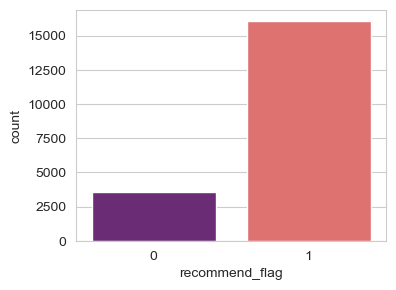

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(4,3))
sns.countplot(data=data,x=data["recommend_flag"],palette='magma')
plt.show()

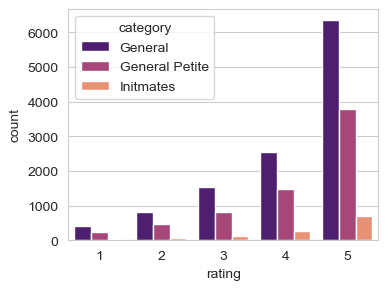

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(4,3))
sns.countplot(data=data,x=data["rating"],hue=data["category"],palette='magma')
plt.show()

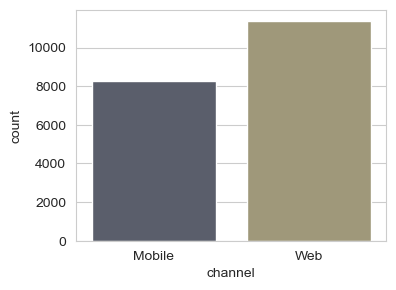

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(4,3))
sns.countplot(data=data,x=data["channel"],palette='cividis')
plt.show()

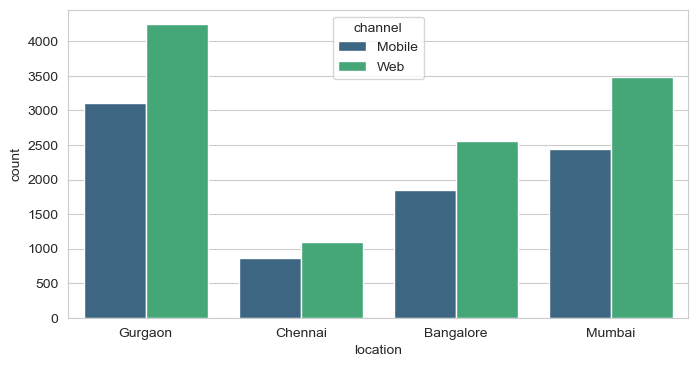

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
sns.countplot(data=data,x=data["location"],hue=data["channel"],palette='viridis')
plt.show()

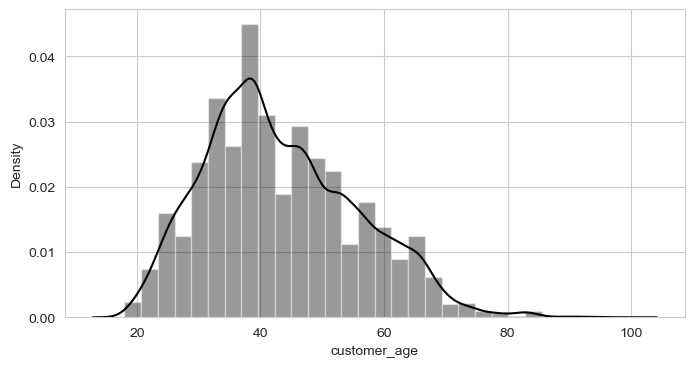

In [24]:
plt.figure(figsize=(8,4))
sns.distplot(data['customer_age'],color='black',bins=30)
plt.show()

## b. Perform text mining tasks to understand what most frequent words are using for positive sentiment and negative sentiment. Create word clouds for the positive & negative reviews separately.

In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [26]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...


True

In [27]:
sid=SentimentIntensityAnalyzer()

In [28]:
data["clean_review_text"]=data["clean_review_text"].astype("str")

In [29]:
#creating sentiment_score
data["sentiment_score"]=data["clean_review_text"].apply(lambda x:sid.polarity_scores(x)["compound"])

## Creating sentiment_categorical column

In [30]:
def sentiment_cat(x):
    if x >=0.1:
        return "positive"
    elif x <0:
        return "negative"
    else:
        return "neutral"

In [31]:
data['sentiment_cat']=data["sentiment_score"].apply(sentiment_cat)
data.head()

,product_id,category,subcategory1,subcategory2,location,channel,customer_age,rating,recommend_flag,clean_review_text,sentiment_score,sentiment_cat
0,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,3,0,high hope dress really wanted work initially o...,0.9081,positive
1,1049,General Petite,Bottoms,Pants,Chennai,Web,50,5,1,love love love jumpsuit fun flirty fabulous ev...,0.9437,positive
2,847,General,Tops,Blouses,Bangalore,Web,47,5,1,shirt flattering due adjustable front tie perf...,0.9062,positive
3,1080,General,Dresses,Dresses,Gurgaon,Web,49,2,0,love tracy reese dress one petite underfeet ta...,0.9153,positive
4,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,5,1,aded basket hte last mintue see would look lik...,0.6361,positive


In [32]:
data['sentiment_cat'].value_counts()

sentiment_cat
positive    18927
negative      489
neutral       246
Name: count, dtype: int64

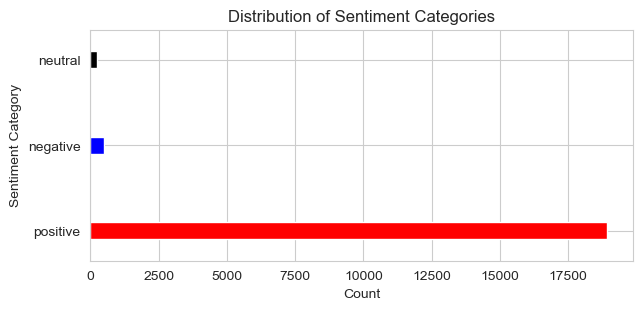

In [33]:
plt.figure(figsize=(7,3))
data["sentiment_cat"].value_counts().plot(kind="barh",width=0.2,color=(["red","blue","black"]))
plt.ylabel("Sentiment Category")
plt.xlabel("Count")
plt.title("Distribution of Sentiment Categories")
plt.show()

## Separating the sentiment_categorical column

In [34]:
data_positive=data[data["sentiment_cat"]=="positive"].reset_index(drop=True)
data_negative=data[data["sentiment_cat"]=="negative"].reset_index(drop=True)
data_neutral=data[data["sentiment_cat"]=="neutral"].reset_index(drop=True)

In [35]:
positive_review=list(data_positive["clean_review_text"].values)
negative_review=list(data_negative["clean_review_text"].values)
neutral_review=list(data_neutral["clean_review_text"].values)

## CountVectorizer for positive_sentiment

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word',ngram_range=(1,1),min_df=10,max_features=1000,
                  token_pattern=r'\w{1,}',encoding="UTF-8")

In [37]:
pos=cv.fit_transform(positive_review)

In [38]:
pos

<18927x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 423433 stored elements in Compressed Sparse Row format>

In [39]:
count_pos=pd.DataFrame(pos.toarray(),columns=sorted(cv.vocabulary_.keys()))

In [40]:
cv.get_feature_names_out()

array(['aand', 'able', 'absolutely', 'abut', 'across', 'actually', 'add',
       'added', 'addition', 'adjustable', 'adorable', 'adore', 'afraid',
       'ag', 'ago', 'agree', 'ai', 'airy', 'aline', 'almost', 'alone',
       'along', 'already', 'also', 'although', 'always', 'amand',
       'amandlbs', 'amazing', 'amlbs', 'amount', 'ampounds', 'amso',
       'amwith', 'anighthing', 'ankle', 'another', 'anyone', 'anyway',
       'appear', 'appears', 'appreciate', 'appropriate', 'area', 'arm',
       'armhole', 'armpit', 'around', 'arrived', 'athletic', 'attached',
       'attention', 'attractive', 'available', 'average', 'away',
       'awesome', 'awkward', 'b', 'baby', 'back', 'bad', 'bag', 'baggy',
       'band', 'barely', 'based', 'basic', 'bathing', 'beach', 'beading',
       'beautiful', 'beautifully', 'beauty', 'become', 'behind', 'beige',
       'believe', 'bell', 'belly', 'belt', 'best', 'better', 'big',
       'bigger', 'bill', 'billowy', 'bit', 'black', 'blazer', 'blend',
     

In [41]:
count_pos.head()

,aand,able,absolutely,abut,across,actually,add,added,addition,adjustable,...,xsp,xx,xxsp,year,yellow,yes,yesterday,yet,zip,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
count_pos.apply(sum)

aand          242
able          372
absolutely    676
abut           80
across        285
             ... 
yes           141
yesterday     100
yet           512
zip           133
zipper        305
Length: 1000, dtype: int64

In [43]:
freq_pos=pd.DataFrame(count_pos.apply(sum),columns=["Frequency"])
freq_pos=freq_pos.sort_values(by="Frequency",ascending=False).head(50)

In [44]:
freq_pos.head(10)

,Frequency
dress,9536
fit,8544
love,7638
top,7043
size,6151
like,6067
look,5858
color,5797
wear,5565
would,5243


<Figure size 600x200 with 0 Axes>

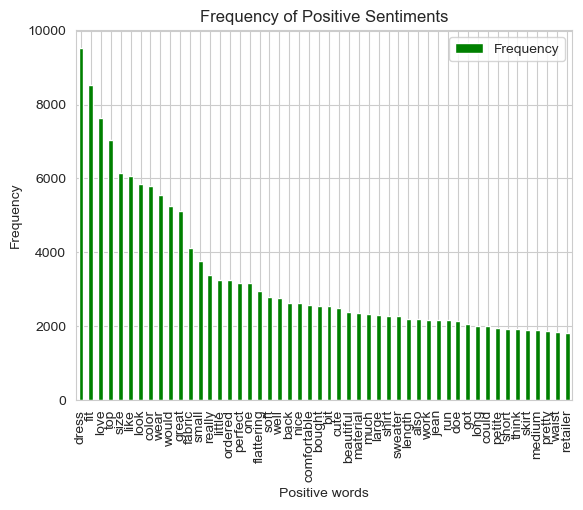

In [45]:
plt.figure(figsize=(6,2))
freq_pos.plot(kind='bar', color='green')
plt.xlabel('Positive words')
plt.ylabel('Frequency')
plt.title('Frequency of Positive Sentiments')
plt.show()

## CountVectorizer for negative_sentiment

In [46]:
cv=CountVectorizer(analyzer='word',ngram_range=(1,2),min_df=5,
                  token_pattern=r'\w{1,}',encoding="UTF-8")

In [47]:
neg=cv.fit_transform(negative_review)

In [48]:
neg

<489x584 sparse matrix of type '<class 'numpy.int64'>'
	with 8952 stored elements in Compressed Sparse Row format>

In [49]:
count_neg=pd.DataFrame(neg.toarray(),columns=sorted(cv.vocabulary_.keys()))

In [50]:
cv.get_feature_names_out()

array(['able', 'absolutely', 'across', 'actually', 'adorable', 'almost',
       'along', 'already', 'also', 'although', 'amand', 'amlbs',
       'anighthing', 'ankle', 'another', 'anymore', 'anyone', 'area',
       'arm', 'arm hole', 'armhole', 'around', 'arrived', 'away', 'awful',
       'awkward', 'b', 'back', 'bad', 'bag', 'baggy', 'barely', 'beach',
       'bead', 'beautiful', 'belt', 'better', 'big', 'bigger', 'bit',
       'black', 'blouse', 'blue', 'bodice', 'body', 'bother', 'bottom',
       'bought', 'boxy', 'bra', 'brand', 'broke', 'bulky', 'bummer',
       'bust', 'busty', 'button', 'buy', 'buying', 'c', 'came', 'cami',
       'cannot', 'cardigan', 'case', 'casual', 'chance', 'cheap', 'chest',
       'clothing', 'coat', 'cold', 'collar', 'color', 'colored', 'come',
       'comfortable', 'comfy', 'complaint', 'completely', 'construction',
       'cotton', 'could', 'could get', 'could worn', 'cozy', 'cream',
       'crotch', 'curvy', 'cut', 'cute', 'damaged', 'darker', 'day', 

In [51]:
count_neg.head()

,able,absolutely,across,actually,adorable,almost,along,already,also,although,...,wrong,wrong place,xl,xx,year,yellow,yesterday,yet,zip,zipper
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
count_neg.apply(sum)

able           8
absolutely     8
across         7
actually      12
adorable       5
              ..
yellow         6
yesterday      5
yet            5
zip           18
zipper        35
Length: 584, dtype: int64

In [53]:
freq_neg=pd.DataFrame(count_neg.apply(sum),columns=["Frequency"])
freq_neg=freq_neg.sort_values(by="Frequency",ascending=False).head(50)

In [54]:
freq_neg

,Frequency
dress,232
look,126
would,123
size,117
back,114
fabric,114
like,101
color,93
wear,92
one,91


<Figure size 600x200 with 0 Axes>

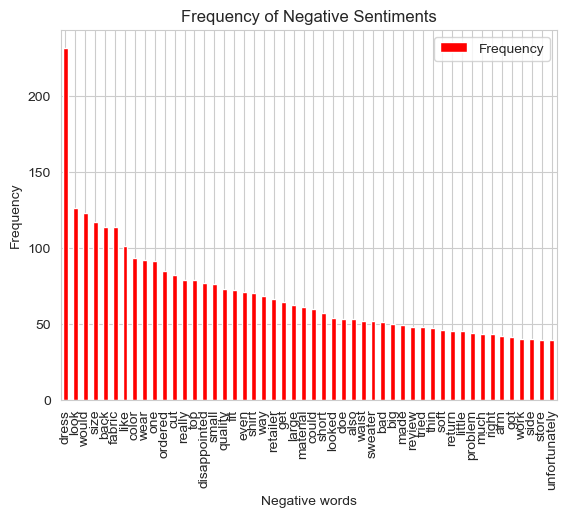

In [55]:
plt.figure(figsize=(6,2))
freq_neg.plot(kind='bar', color='red')
plt.xlabel('Negative words')
plt.ylabel('Frequency')
plt.title('Frequency of Negative Sentiments')
plt.show()

## CountVectorizer for neutral_sentiment 

In [56]:
cv=CountVectorizer(analyzer='word',ngram_range=(1,2),min_df=5,
                  token_pattern=r'\w{1,}',encoding="UTF-8")

In [57]:
neutral=cv.fit_transform(neutral_review)

In [58]:
neutral

<246x215 sparse matrix of type '<class 'numpy.int64'>'
	with 2506 stored elements in Compressed Sparse Row format>

In [59]:
count_neutral=pd.DataFrame(neutral.toarray(),columns=sorted(cv.vocabulary_.keys()))

In [60]:
cv.get_feature_names_out()

array(['able', 'add', 'already', 'also', 'amand', 'amlbs', 'another',
       'appears', 'area', 'arm', 'around', 'back', 'bad', 'big', 'bit',
       'black', 'body', 'bottom', 'bought', 'boxy', 'bra', 'bust',
       'button', 'buy', 'cannot', 'chest', 'color', 'come', 'comfy',
       'could', 'could even', 'cut', 'cute', 'decided', 'delicate',
       'design', 'different', 'disappointed', 'doe', 'dress', 'ended',
       'enough', 'even', 'expected', 'fabric', 'fall', 'feel', 'felt',
       'first', 'fit', 'fitting', 'flat', 'flattering', 'front', 'get',
       'give', 'go', 'going', 'going back', 'got', 'great', 'green',
       'guess', 'hang', 'head', 'hem', 'high', 'hip', 'hit', 'hole',
       'however', 'huge', 'instead', 'jean', 'keep', 'knee', 'large',
       'larger', 'lay', 'leg', 'legging', 'length', 'like', 'little',
       'long', 'longer', 'look', 'look like', 'looked', 'looking',
       'loose', 'lot', 'love', 'low', 'made', 'make', 'make look',
       'material', 'mean', '

In [61]:
count_neutral.head()

,able,add,already,also,amand,amlbs,another,appears,area,arm,...,well,went,white,wide,without,woman,wore,work,worn,would
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
count_neutral.apply(sum)

able        5
add         5
already     8
also       23
amand       7
           ..
woman       6
wore        9
work       22
worn        7
would      43
Length: 215, dtype: int64

In [63]:
freq_neu=pd.DataFrame(count_neutral.apply(sum),columns=["Frequency"])
freq_neu=freq_neu.sort_values(by="Frequency",ascending=False)

In [64]:
freq_neu

,Frequency
dress,77
small,71
size,64
shirt,46
look,45
...,...
great,5
appears,5
guess,5
underneath,5


<Figure size 600x200 with 0 Axes>

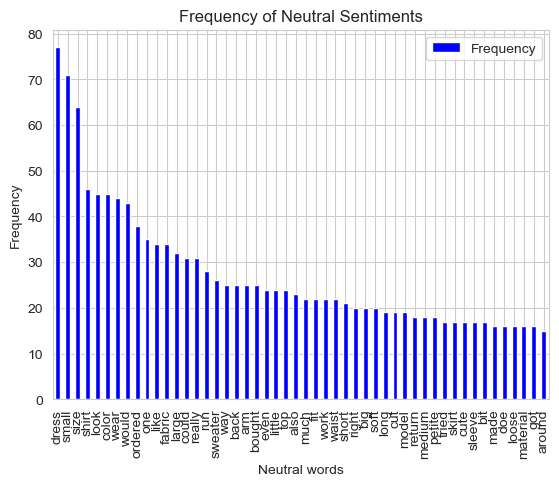

In [65]:
plt.figure(figsize=(6,2))
freq_neu.head(50).plot(kind='bar', color='blue')
plt.xlabel('Neutral words')
plt.ylabel('Frequency')
plt.title('Frequency of Neutral Sentiments')
plt.show()

In [67]:
!pip install wordcloud
from wordcloud import WordCloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 326.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 525.1 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00


## Positive WordCloud

In [68]:
dict_pos=dict(count_pos.apply(sum))

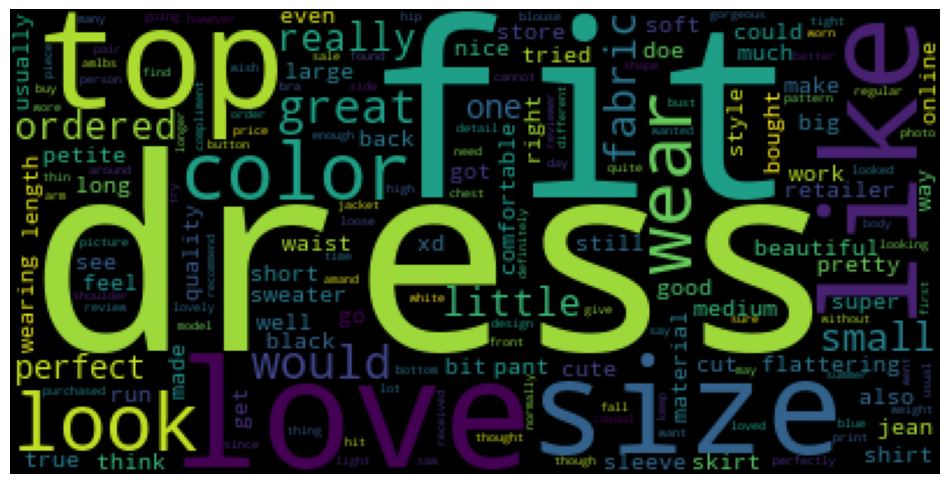

In [69]:
wordcloud=WordCloud(background_color="black",random_state=123).generate_from_frequencies(dict_pos)
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Negative WordCloud

In [70]:
dict_neg=dict(count_neg.apply(sum))

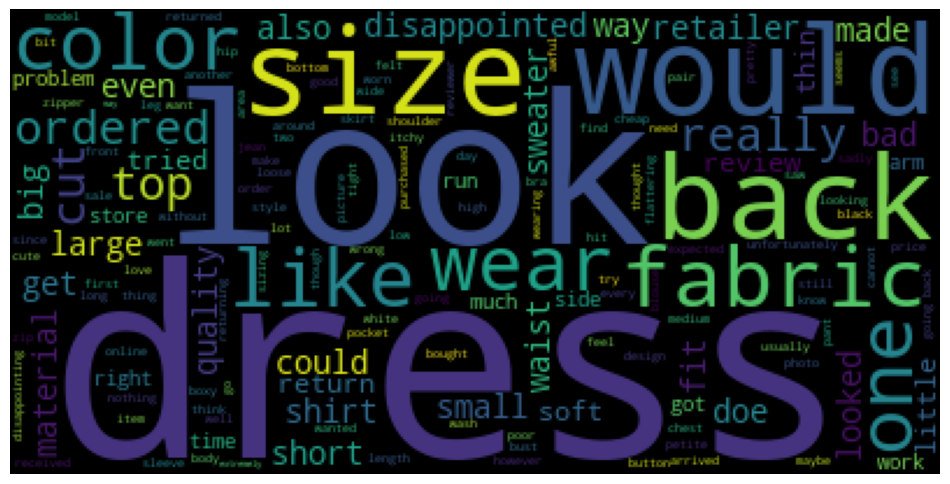

In [71]:
wordcloud=WordCloud(background_color="black",random_state=15).generate_from_frequencies(dict_neg)
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Neutral WordCloud

In [72]:
dict_neu=dict(count_neutral.apply(sum))

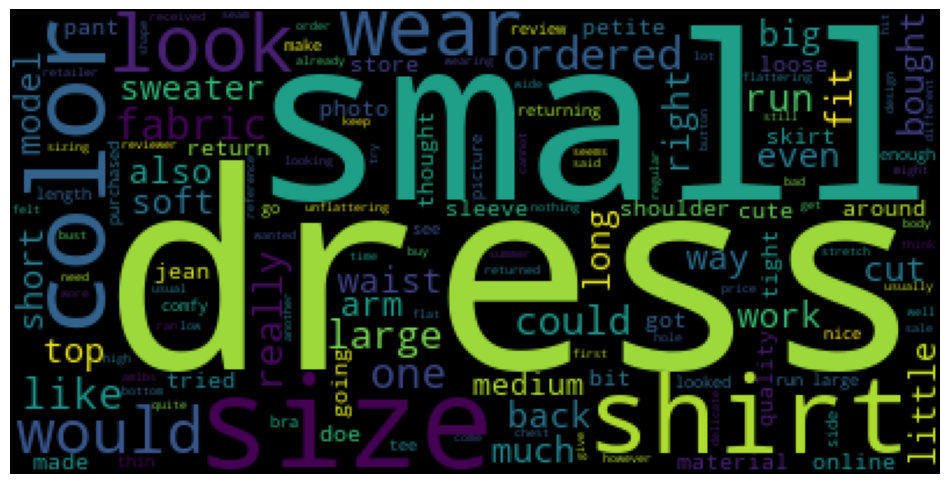

In [73]:
wordcloud=WordCloud(background_color="black",random_state=123).generate_from_frequencies(dict_neu)
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## c. Understand sentiment among the customers on the different categories, sub categories, products by location and age group

In [74]:
#finding age_group
age_bin=[0,29,39,49,59,69,79,89,99]
age_label=["18-29","29-39","39-49","49-59","59-69","69-79","79-89","89-99"]

In [75]:
data["age_group"]=pd.cut(x=data['customer_age'],bins=age_bin,labels=age_label)

## category_sentiment

In [76]:
a=data.groupby(['category','sentiment_cat']).agg(sentiment=("sentiment_cat","count")).reset_index()
category_sentiment=pd.crosstab(a['category'], a['sentiment_cat'], values=a['sentiment'], aggfunc='sum')
category_sentiment=category_sentiment.reset_index()
category_sentiment

sentiment_cat,category,negative,neutral,positive
0,General,291,148,11225
1,General Petite,166,79,6533
2,Initmates,32,19,1169


## subcategory_sentiment

In [77]:
b=data.groupby(['subcategory1','sentiment_cat']).agg(sentiment=("sentiment_cat","count")).reset_index()
subcategory_sentiment=pd.crosstab(b['subcategory1'], b['sentiment_cat'], values=b['sentiment'], aggfunc='sum')
subcategory_sentiment=subcategory_sentiment.reset_index()
subcategory_sentiment

sentiment_cat,subcategory1,negative,neutral,positive
0,Bottoms,79.0,43.0,3062.0
1,Dresses,138.0,53.0,5180.0
2,Intimate,37.0,23.0,1348.0
3,Jackets,16.0,12.0,851.0
4,Tops,212.0,115.0,8386.0
5,Trend,7.0,NaN,100.0


## subcategory2_sentiment

In [78]:
b=data.groupby(['subcategory2','sentiment_cat']).agg(sentiment=("sentiment_cat","count")).reset_index()
subcategory2_sentiment=pd.crosstab(b['subcategory2'], b['sentiment_cat'], values=b['sentiment'], aggfunc='sum')
subcategory2_sentiment=subcategory2_sentiment.fillna(0).reset_index()
subcategory2_sentiment

sentiment_cat,subcategory2,negative,neutral,positive
0,Blouses,58.0,25.0,2504.0
1,Casual bottoms,0.0,0.0,1.0
2,Chemises,0.0,0.0,1.0
3,Dresses,138.0,53.0,5180.0
4,Fine gauge,25.0,14.0,888.0
5,Intimates,3.0,2.0,115.0
6,Jackets,10.0,10.0,578.0
7,Jeans,21.0,13.0,936.0
8,Knits,89.0,66.0,3826.0
9,Layering,1.0,4.0,110.0


## location_sentiment

In [79]:
b=data.groupby(['location','sentiment_cat']).agg(sentiment=("sentiment_cat","count")).reset_index()
location_sentiment=pd.crosstab(b['location'], b['sentiment_cat'], values=b['sentiment'], aggfunc='sum')
location_sentiment=location_sentiment.reset_index()
location_sentiment

sentiment_cat,location,negative,neutral,positive
0,Bangalore,105,60,4240
1,Chennai,59,20,1880
2,Gurgaon,189,102,7070
3,Mumbai,136,64,5737


## age_group_sentiment

In [80]:
b=data.groupby(['age_group','sentiment_cat']).agg(sentiment=("sentiment_cat","count")).reset_index()
age_group_sentiment=pd.crosstab(b['age_group'], b['sentiment_cat'], values=b['sentiment'], aggfunc='sum')
age_group_sentiment=age_group_sentiment.reset_index()
age_group_sentiment

sentiment_cat,age_group,negative,neutral,positive
0,18-29,65,28,2371
1,29-39,157,84,6143
2,39-49,125,66,4974
3,49-59,94,37,3178
4,59-69,43,27,1875
5,69-79,5,4,295
6,79-89,0,0,81
7,89-99,0,0,10


## Visualizing the sentiment data

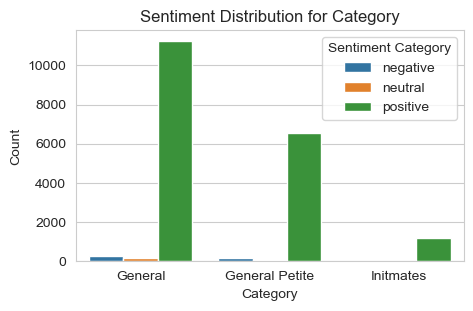

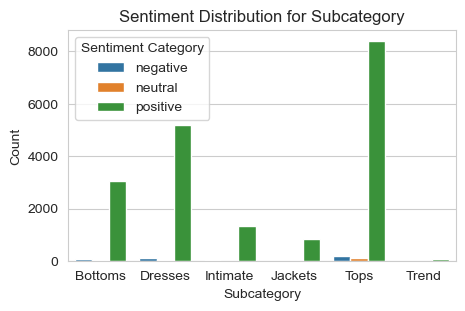

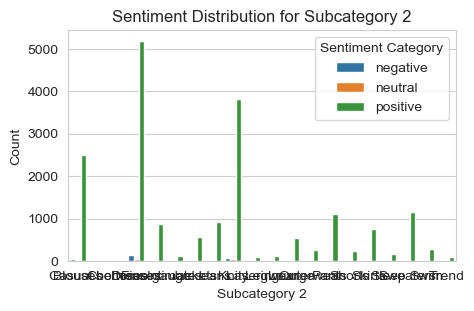

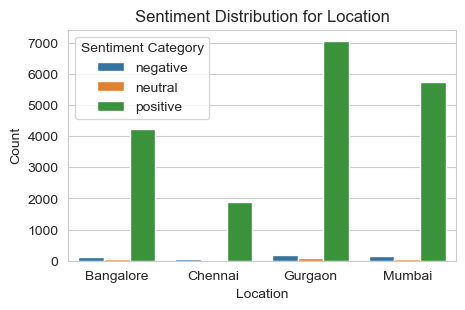

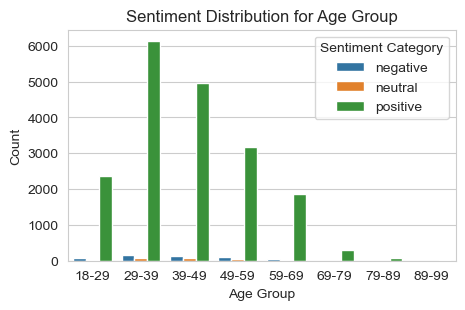

In [81]:
# List of dataframes and corresponding titles
dataframes = [category_sentiment, subcategory_sentiment, subcategory2_sentiment, location_sentiment, age_group_sentiment]
titles = ['Category', 'Subcategory', 'Subcategory 2', 'Location', 'Age Group']

# Iterate over each dataframe and title
for df, title in zip(dataframes, titles):
    # Reshape the dataframe to have a single column for sentiment categories
    df_melted = df.melt(id_vars=df.columns[0], var_name='sentiment_cat', value_name='count')
    
    # Create a new plot for each dataframe
    plt.figure(figsize=(5, 3))
    
    # Plot
    sns.barplot(data=df_melted, x=df.columns[0], y='count', hue='sentiment_cat')
    
    # Set labels and title
    plt.xlabel(title)
    plt.ylabel('Count')
    plt.title(f'Sentiment Distribution for {title}')
    plt.legend(title='Sentiment Category')
    
    # Show plot
    plt.show()


## d. Perform predictive analytics to understand the drivers of customers who are recommending the products.

In [82]:
data_encoded = pd.get_dummies(data, columns=['category', 'subcategory1', 'subcategory2', 'location', 'channel', 'age_group', 'sentiment_cat'],dtype="int")

## Embedding clean_review_text column to numeric column using Tfidf

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
tfid = TfidfVectorizer(lowercase=True, stop_words='english', max_features=100, min_df=5, ngram_range=(1, 2))

In [85]:
review_num=tfid.fit_transform(data_encoded['clean_review_text'])

In [86]:
review_num=pd.DataFrame(review_num.toarray())

In [87]:
review_num.columns=sorted(tfid.get_feature_names_out())

In [88]:
data_encoded_final=pd.concat([data_encoded,review_num,],axis=1)

In [89]:
data_encoded_final.drop("clean_review_text",axis=1,inplace=True)

In [90]:
#feature selections
X=data_encoded_final.drop("recommend_flag",axis=1)
Y=data_encoded_final["recommend_flag"]

## Splitting train and test model

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=23)

In [93]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15729, 150), (3933, 150), (15729,), (3933,))

## Logistic Regression Algorithm

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [95]:
lr=LogisticRegression(random_state=42)
lr.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [96]:
y_pred=lr.predict(x_test)

In [97]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [98]:
print("LogisticRegression Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

LogisticRegression Metrics:
Accuracy: 0.9267734553775744
Precision: 0.9621380846325167
Recall: 0.9470717193861572
F1-score: 0.9545454545454545


## Random Forest Classifier Algorithm

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rf=RandomForestClassifier(random_state=42)

In [101]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [102]:
y_pred_rf=rf.predict(x_test)

In [103]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

In [104]:
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Random Forest Classifier Metrics:
Accuracy: 0.9336384439359268
Precision: 0.968370607028754
Recall: 0.9492640150328845
F1-score: 0.9587221255733038


## Overall, it seems like all three classifiers performed reasonably well on your dataset, Random Forest slightly outperforming the Linear Classifier in terms of accuracy. However the best model perform in this data is  Random Forest Classifier

## Predicting the recommend_flag using Random Forest Classifier

In [107]:
y_pred_rf=pd.DataFrame(y_pred_rf,index=x_test.index,columns=["predicted_flag"])

In [108]:
predicted_flag=pd.merge(data,y_pred_rf,left_index=True,right_index=True,how="inner")
predicted_flag.head()

,product_id,category,subcategory1,subcategory2,location,channel,customer_age,rating,recommend_flag,clean_review_text,sentiment_score,sentiment_cat,age_group,predicted_flag
5,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,4,1,ordered carbon store pick ton stuff always try...,0.5709,positive,29-39,1
6,1077,General,Dresses,Dresses,Mumbai,Web,24,5,1,love dress usually get run little snug bust or...,0.7579,positive,18-29,1
8,1077,General,Dresses,Dresses,Mumbai,Mobile,53,3,0,dress run small esp zipper area run ordered sp...,0.5267,positive,49-59,0
15,1120,General,Jackets,Outerwear,Chennai,Mobile,32,5,1,flattering super cozy coatwill work well cold ...,0.9501,positive,29-39,1
17,847,General,Tops,Blouses,Mumbai,Mobile,33,4,1,product petite would get petite regular little...,0.9771,positive,29-39,1


##  main key drivers of customers who are recommending the products.

In [109]:
print(", ".join(list(tfid.get_feature_names_out())))

amand, arm, beautiful, better, big, bit, black, blue, body, bought, color, comfortable, cut, cute, definitely, design, doe, dress, fabric, fall, feel, fit, flattering, going, good, got, great, jacket, jean, large, length, like, little, long, look, looked, looking, loose, lot, love, loved, make, material, medium, model, need, nice, online, ordered, pair, pant, pattern, perfect, perfectly, person, petite, photo, picture, piece, pretty, price, purchased, quality, really, retailer, review, right, run, sale, saw, shirt, short, shoulder, size, skirt, sleeve, small, soft, store, style, summer, super, sweater, think, thought, tight, time, tried, true, true size, try, usually, waist, way, wear, wearing, white, work, worn, xd


## e. Create topics and understand themes behind the topics by performing topic mining.


In [110]:
from gensim import corpora
from gensim.models import LdaModel
from pprint import pprint

In [111]:
doc=data["clean_review_text"].tolist()

In [112]:
tokenized_documents = [d.split() for d in doc]

In [113]:
dictionary=corpora.Dictionary(tokenized_documents)

In [114]:
corpus=[dictionary.doc2bow(i) for i in tokenized_documents]

In [115]:
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

In [116]:
topic=LdaModel.show_topics(lda_model,num_topics=5,num_words=30,formatted=False)

In [117]:
for topic_id,topic_keyword in topic:
    print(f"Topic {topic_id+1}:")
    print(", ".join(i[0] for i in topic_keyword))

Topic 1:
love, fit, great, wear, color, top, perfect, size, look, jean, soft, comfortable, bought, pant, like, little, well, nice, flattering, long, length, cute, black, fabric, small, skirt, super, bit, shirt, one
Topic 2:
dress, love, wear, store, one, retailer, time, compliment, saw, bought, perfect, fit, wore, many, get, first, comfortable, beautiful, tried, got, sale, online, would, received, could, flattering, price, cannot, wearing, try
Topic 3:
top, would, like, size, fit, look, small, dress, fabric, ordered, really, back, large, little, waist, petite, bit, material, love, way, much, run, doe, arm, also, big, shirt, think, pretty, tried
Topic 4:
sweater, color, soft, like, look, blue, sleeve, picture, coat, person, photo, pink, online, beautiful, much, fabric, red, back, knit, warm, doe, green, white, love, light, make, itchy, one, detail, design
Topic 5:
xd, twice, beige, metallic, nearly, swimming, floor, cross, thru, third, lucky, sooo, robe, bunched, ribbed, cap, raw, self,

## These are the topics performed by topic mining.

## Thank You